In [3]:
!pip install opencv-python

                                              0.0/38.8 MB ? eta -:--:--
                                              0.1/38.8 MB 2.0 MB/s eta 0:00:20
                                              0.5/38.8 MB 6.3 MB/s eta 0:00:07
     -                                        1.2/38.8 MB 8.4 MB/s eta 0:00:05
     --                                       2.0/38.8 MB 11.6 MB/s eta 0:00:04
     --                                       2.8/38.8 MB 12.7 MB/s eta 0:00:03
     ---                                      3.6/38.8 MB 12.7 MB/s eta 0:00:03
     ----                                     4.3/38.8 MB 13.7 MB/s eta 0:00:03
     ----                                     4.8/38.8 MB 13.9 MB/s eta 0:00:03
     ----                                     4.8/38.8 MB 13.9 MB/s eta 0:00:03
     ----                                     4.8/38.8 MB 13.9 MB/s eta 0:00:03
     -----                                    4.9/38.8 MB 10.0 MB/s eta 0:00:04
     -----                                    5.0/3

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm.notebook import tqdm

import subprocess
import os

In [2]:
input_file = r"C:\Users\Lenovo\Downloads\00054602-3bf57337.mov"
ffmpeg_path = r"C:\Users\Lenovo\Downloads\ffmpeg-2024-11-25-git-04ce01df0b-full_build\ffmpeg-2024-11-25-git-04ce01df0b-full_build\bin\ffmpeg.exe"
#print(os.path.exists(input_file))
subprocess.run([ffmpeg_path, '-i', input_file,'-qscale', '0',
               'test_tracking.mp4'])

CompletedProcess(args=['C:\\Users\\Lenovo\\Downloads\\ffmpeg-2024-11-25-git-04ce01df0b-full_build\\ffmpeg-2024-11-25-git-04ce01df0b-full_build\\bin\\ffmpeg.exe', '-i', 'C:\\Users\\Lenovo\\Downloads\\00054602-3bf57337.mov', '-qscale', '0', 'test_tracking.mp4'], returncode=0)

In [3]:
result = subprocess.run([ffmpeg_path, '-version'], capture_output=True, text=True)
print(result.stdout)

ffmpeg version 2024-11-25-git-04ce01df0b-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
built with gcc 14.2.0 (Rev1, Built by MSYS2 project)
configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libopenjpeg --enable-libquirc --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-libqrencode --enable-librav1e --enable-libsvtav1 --enable-libvvenc --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve --enable-libxvid --enable-libaom --enable-libjxl --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r 

In [4]:
ipd.Video("00054602-3bf57337.mp4", width = 500)

In [5]:
cap = cv2.VideoCapture("00054602-3bf57337.mp4")

In [6]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

1220.0

In [7]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
witdh = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'height is {height} and witdh is {witdh}')

height is 720.0 and witdh is 1280.0


In [8]:
ret, img = cap.read()
print(f'Return{ret} and image shape: {img.shape}')

ReturnTrue and image shape: (720, 1280, 3)


In [9]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

In [10]:
def display_cv2(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis('off')

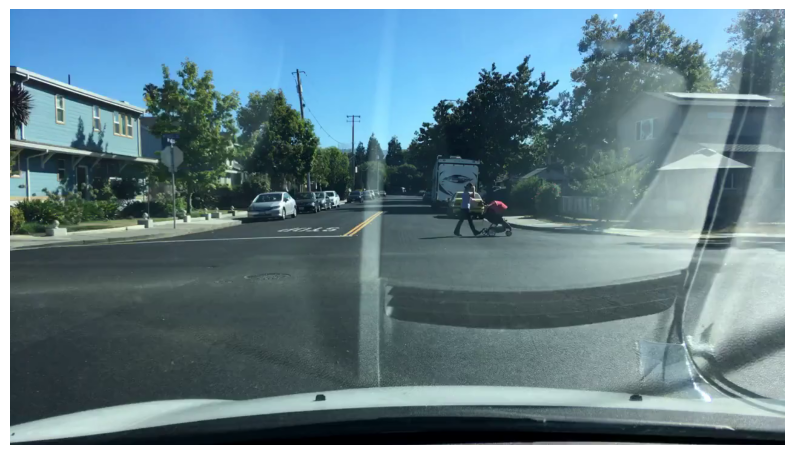

In [11]:
display_cv2(img)

In [12]:
cap.release()
cap = cv2.VideoCapture("00054602-3bf57337.mp4")

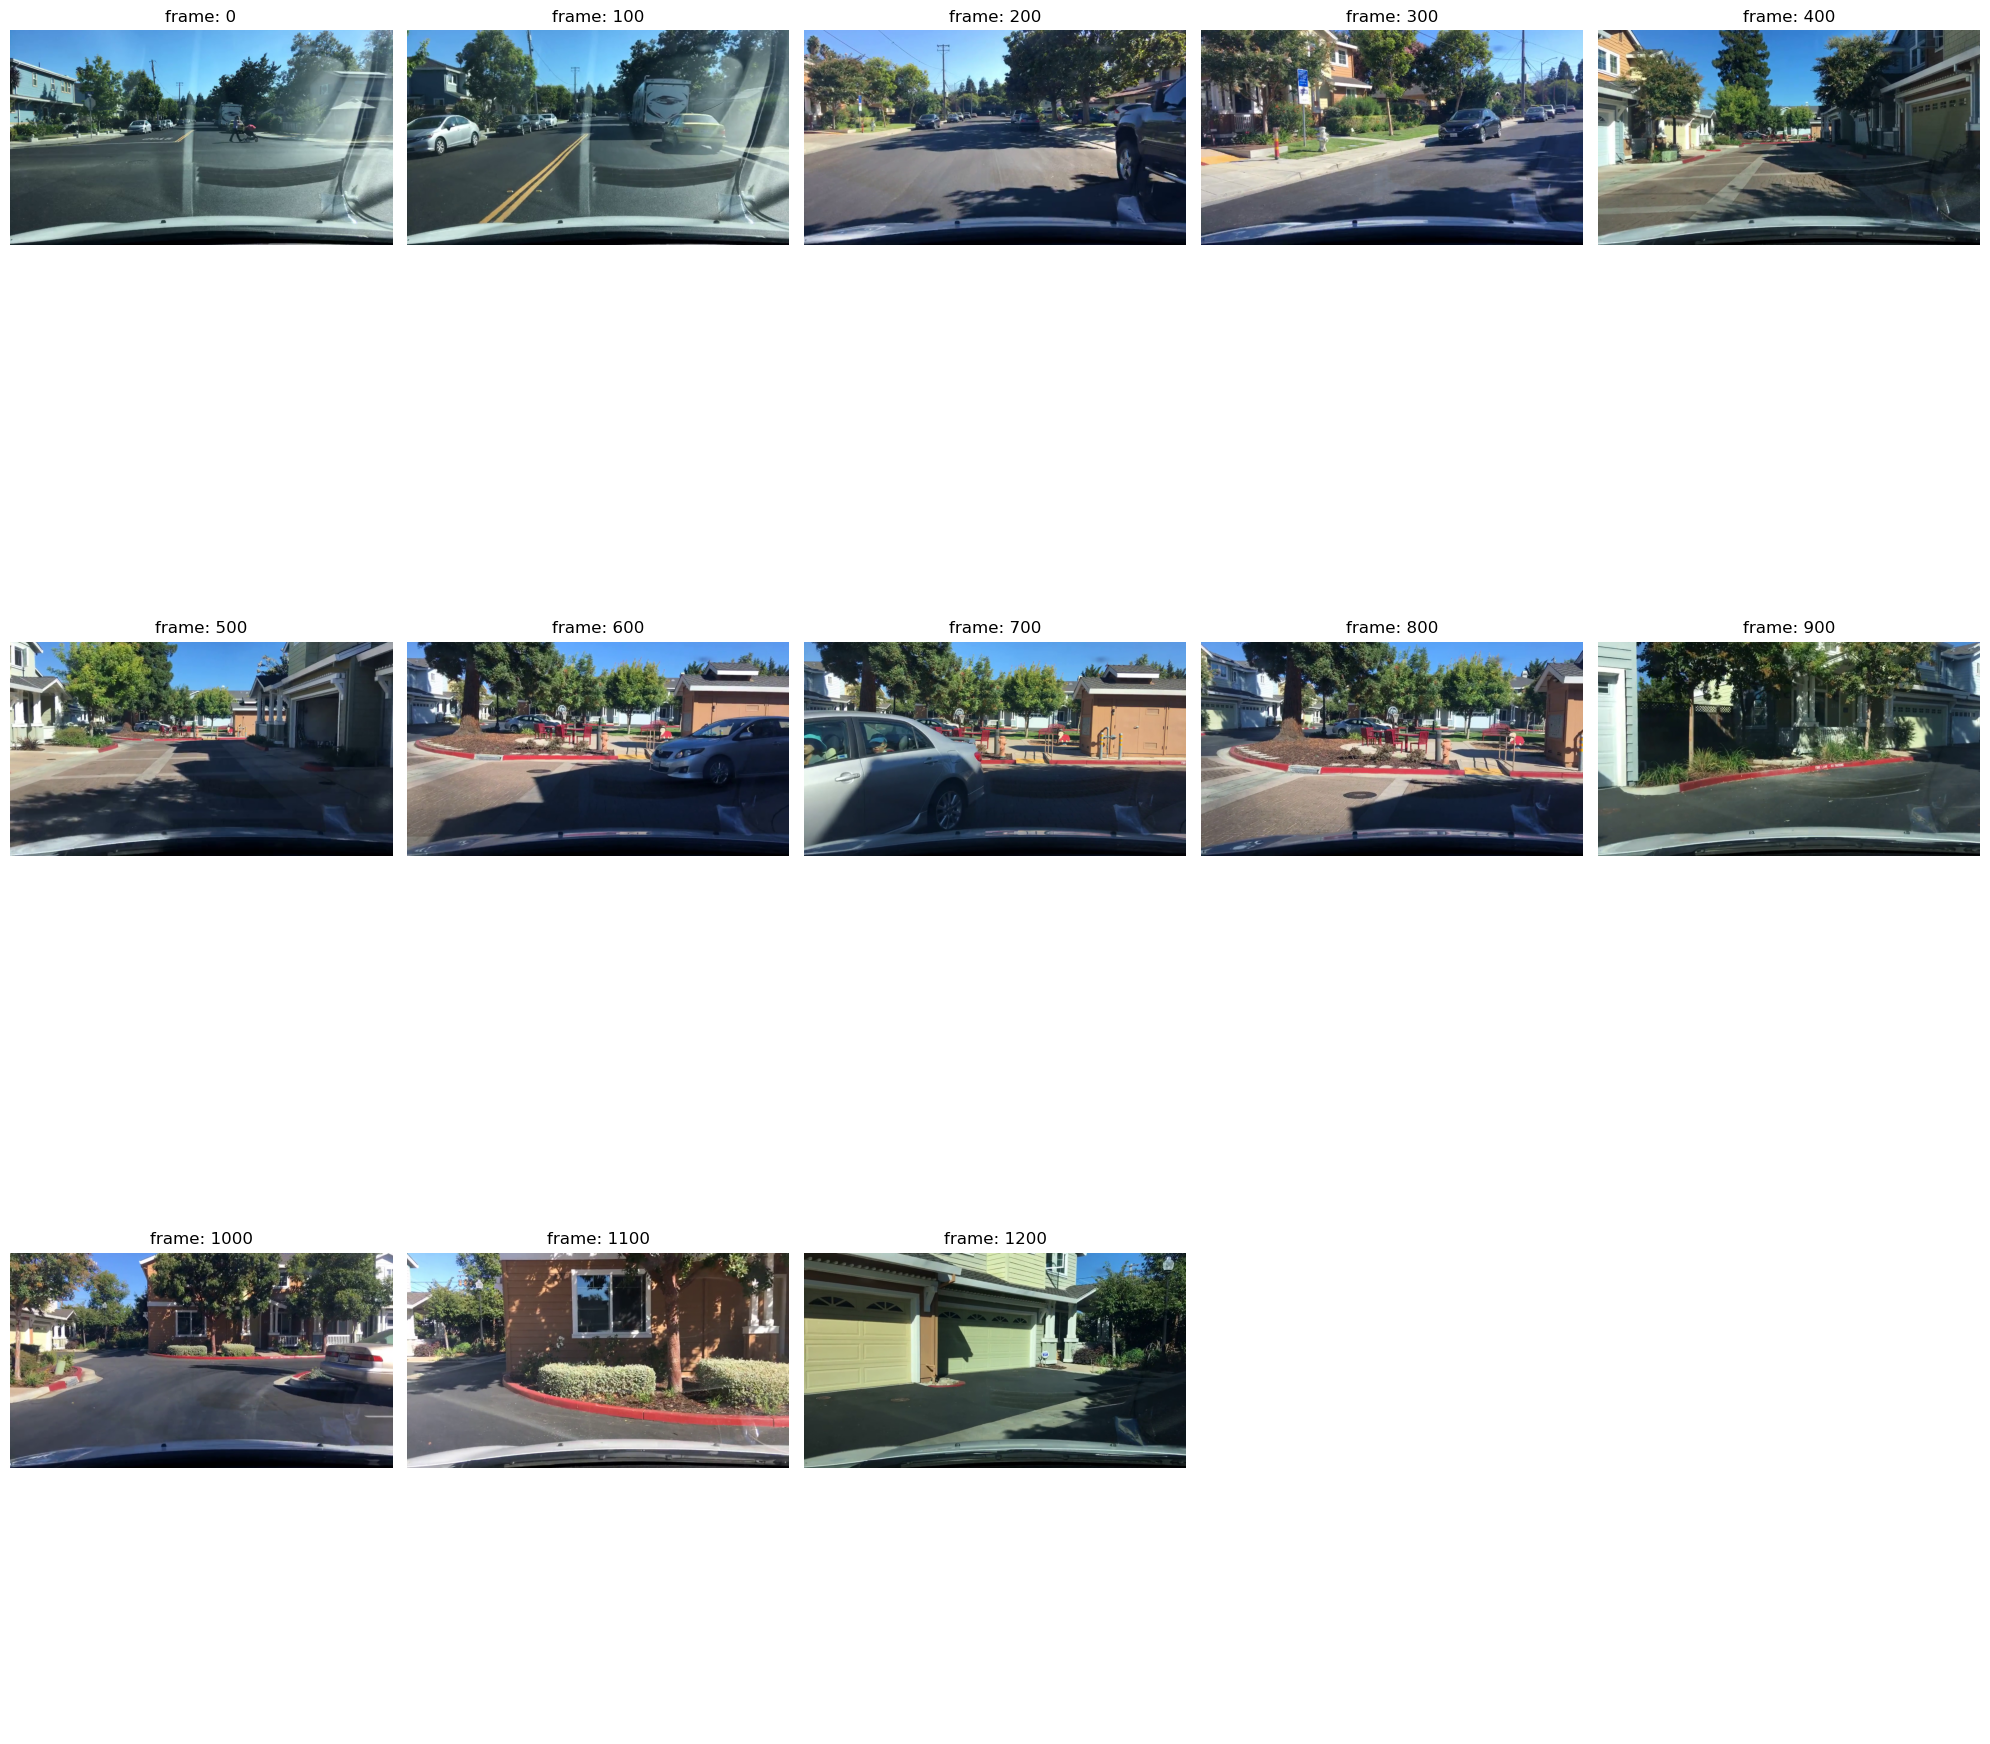

In [13]:
fig, axs = plt.subplots(3, 5, figsize=(20,20))
axs = axs.flatten()

cap = cv2.VideoCapture("00054602-3bf57337.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1
        if img_idx >= len(axs): 
            break
            
for i in range(img_idx, len(axs)):
    axs[i].axis('off')
    
plt.tight_layout()
plt.show()
cap.release()
cap = cv2.VideoCapture("00054602-3bf57337.mp4")

In [14]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

In [15]:
labels = pd.read_csv(r"C:\Users\Lenovo\Downloads\mot_label\mot_labels.csv", low_memory = False)
labels

name          videoName  frameIndex  \
0        01c71072-718028b8-0000001.jpg  01c71072-718028b8           0   
1        01c71072-718028b8-0000001.jpg  01c71072-718028b8           0   
2        01c71072-718028b8-0000001.jpg  01c71072-718028b8           0   
3        01c71072-718028b8-0000001.jpg  01c71072-718028b8           0   
4        01c71072-718028b8-0000001.jpg  01c71072-718028b8           0   
...                                ...                ...         ...   
2890841  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890842  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890843  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890844  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   
2890845  00adbb3f-7757d4ea-0000202.jpg  00adbb3f-7757d4ea         201   

              id    category attributes.crowd attributes.occluded  \
0        89537.0         car            False                True   
1        89538.0         car            False                True   
2        89539.0  pedestrian            False                True   
3        89540.0         car            False               False   
4        89541.0         car            False               False   
...          ...         ...              ...                 ...   
2890841  70587.0         car            False                True   
2890842  70591.0         car            False                True   
2890843  70593.0         car            False                True   
2890844  70581.0         car            False                True   
2890845  70582.0         bus            False                True   

        attributes.truncated    box2d.x1     box2d.x2    box2d.y1    box2d.y2  \
0                      False  825.173210  1003.094688  355.011547  418.198614   
1                      False  484.295612   700.461894  346.697460  424.849885   
2                      False  645.588915   663.879908  338.383372  358.337182   
3                      False  120.969977   192.471132  359.168591  409.053118   
4                      False  251.501155   315.519630  354.180139  400.739030   
...                      ...         ...          ...         ...         ...   
2890841                False  105.312994   169.282443  451.341401  500.152672   
2890842                False  312.328249   368.244275  460.368229  490.457656   
2890843                False  368.533042   414.700981  467.384253  491.059444   
2890844                False    0.524781   111.778426  446.064140  500.641399   
2890845                False  232.663849   288.368237  439.815242  453.748555   

         haveVideo  
0             True  
1             True  
2             True  
3             True  
4             True  
...            ...  
2890841       True  
2890842       True  
2890843       True  
2890844       True  
2890845       True  

[2890846 rows x 13 columns]

In [16]:
video_label = ( labels.query('videoName == "00054602-3bf57337"').reset_index(drop=True).copy())
video_label['video_frame'] = (video_label['frameIndex'] * 11.9).round().astype('int')

In [17]:
video_label['category'].value_counts()

car              725
truck             32
pedestrian        12
other vehicle     11
Name: category, dtype: int64

In [18]:
video_label

name          videoName  frameIndex       id  \
0    00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82594.0   
1    00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82595.0   
2    00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82596.0   
3    00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82597.0   
4    00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82598.0   
..                             ...                ...         ...      ...   
826  00054602-3bf57337-0000201.jpg  00054602-3bf57337         200      NaN   
827  00054602-3bf57337-0000202.jpg  00054602-3bf57337         201      NaN   
828  00054602-3bf57337-0000203.jpg  00054602-3bf57337         202      NaN   
829  00054602-3bf57337-0000204.jpg  00054602-3bf57337         203      NaN   
830  00054602-3bf57337-0000205.jpg  00054602-3bf57337         204      NaN   

       category attributes.crowd attributes.occluded attributes.truncated  \
0           car            False               False                False   
1    pedestrian            False               False                False   
2           car            False                True                False   
3           car            False                True                False   
4           car            False                True                False   
..          ...              ...                 ...                  ...   
826         NaN              NaN                 NaN                  NaN   
827         NaN              NaN                 NaN                  NaN   
828         NaN              NaN                 NaN                  NaN   
829         NaN              NaN                 NaN                  NaN   
830         NaN              NaN                 NaN                  NaN   

       box2d.x1    box2d.x2    box2d.y1    box2d.y2  haveVideo  video_frame  
0    389.990355  473.859248  300.530199  351.200989       True            0  
1    731.795085  779.683214  285.591053  376.706573       True            0  
2    469.782288  512.299157  301.695045  337.805263       True            0  
3    505.892506  530.936689  299.365354  332.563457       True            0  
4    515.860058  545.604190  300.530199  329.651343       True            0  
..          ...         ...         ...         ...        ...          ...  
826         NaN         NaN         NaN         NaN       True         2380  
827         NaN         NaN         NaN         NaN       True         2392  
828         NaN         NaN         NaN         NaN       True         2404  
829         NaN         NaN         NaN         NaN       True         2416  
830         NaN         NaN         NaN         NaN       True         2428  

[831 rows x 14 columns]

In [19]:
video_label.isna().sum()

name                     0
videoName                0
frameIndex               0
id                      51
category                51
attributes.crowd        51
attributes.occluded     51
attributes.truncated    51
box2d.x1                51
box2d.x2                51
box2d.y1                51
box2d.y2                51
haveVideo                0
video_frame              0
dtype: int64

In [20]:
video_label = video_label.dropna()

In [21]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

In [22]:
cap = cv2.VideoCapture("00054602-3bf57337.mp4") #Choosing which frame has the most object
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 0:
        break
            
for i in range(img_idx, len(axs)):
    axs[i].axis('off')
    
cap.release()
cap = cv2.VideoCapture("00054602-3bf57337.mp4")

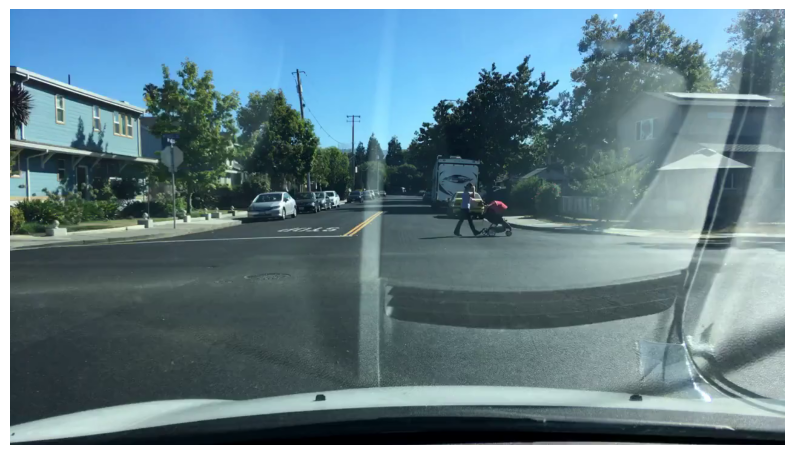

In [23]:
display_cv2(img)

In [24]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

In [25]:
img_emp = img.copy()
frame_100 = video_label.query('video_frame == 0')

frame_100

#if frame_100.empty:
        #print("No rows found for video_frame == 100")

name          videoName  frameIndex       id  \
0   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82594.0   
1   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82595.0   
2   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82596.0   
3   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82597.0   
4   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82598.0   
5   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82599.0   
6   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82600.0   
7   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82601.0   
8   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82602.0   
9   00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82603.0   
10  00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82604.0   
11  00054602-3bf57337-0000001.jpg  00054602-3bf57337           0  82605.0   

         category attributes.crowd attributes.occluded attributes.truncated  \
0             car            False               False                False   
1      pedestrian            False               False                False   
2             car            False                True                False   
3             car            False                True                False   
4             car            False                True                False   
5             car            False               False                False   
6             car            False                True                False   
7           truck            False                True                False   
8             car            False                True                False   
9             car            False                True                False   
10            car            False               False                False   
11  other vehicle            False               False                False   

      box2d.x1    box2d.x2    box2d.y1    box2d.y2  haveVideo  video_frame  
0   389.990355  473.859248  300.530199  351.200989       True            0  
1   731.795085  779.683214  285.591053  376.706573       True            0  
2   469.782288  512.299157  301.695045  337.805263       True            0  
3   505.892506  530.936689  299.365354  332.563457       True            0  
4   515.860058  545.604190  300.530199  329.651343       True            0  
5   557.145718  587.230321  300.530199  320.915000       True            0  
6   721.866565  786.690230  299.656565  346.133910       True            0  
7   693.735540  783.498542  239.113708  330.612245       True            0  
8   580.932945  597.915319  299.365354  316.838040       True            0  
9   678.564655  695.495950  295.484194  322.375074       True            0  
10  609.979333  621.432856  299.603845  310.061409       True            0  
11  772.494600  829.532725  315.693628  375.211671       True            0

In [26]:

for i, d in frame_100.iterrows():
    #print(f"Processing row {i}: {d}")
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img_emp, pt1, pt2, (0,0,255), 3)
    


In [27]:
d

name                    00054602-3bf57337-0000001.jpg
videoName                           00054602-3bf57337
frameIndex                                          0
id                                            82605.0
category                                other vehicle
attributes.crowd                                False
attributes.occluded                             False
attributes.truncated                            False
box2d.x1                                     772.4946
box2d.x2                                   829.532725
box2d.y1                                   315.693628
box2d.y2                                   375.211671
haveVideo                                        True
video_frame                                         0
Name: 11, dtype: object

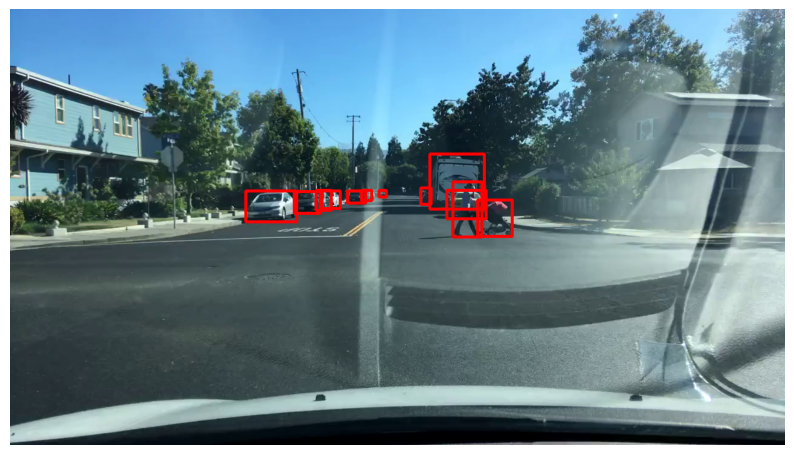

In [28]:
display_cv2(img_emp)

In [29]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

In [30]:
video_label['category'].unique()

array(['car', 'pedestrian', 'truck', 'other vehicle'], dtype=object)

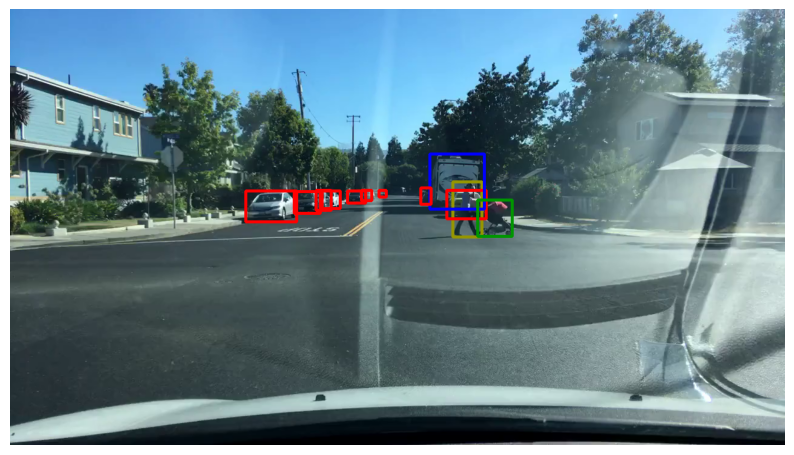

In [31]:
color_map = {
    'car' : (0,0,255),
    'pedestrian' : (0,150,150),
    'truck' : (255,0,0),
    'other vehicle' : (0,150,0)
}


img_colored = img.copy()
for i, d in frame_100.iterrows():
    #print(f"Processing row {i}: {d}")
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img_colored, pt1, pt2, color, 3)
    
display_cv2(img_colored)
cap.release()
cap = cv2.VideoCapture("00054602-3bf57337.mp4")

In [32]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

### Finishing

In [33]:
def interpolate_annotations(frame, frame_annotations, scale_factor=1.0):
    if frame in frame_annotations:
        return frame_annotations[frame]

    # Find closest frames with annotations
    keys = sorted(frame_annotations.keys())
    prev_key = max([k for k in keys if k < frame], default=None)
    next_key = min([k for k in keys if k > frame], default=None)

    if prev_key is None or next_key is None:
        return None  # No annotations available

    # Linear interpolation for the bounding boxes
    prev_labels = frame_annotations[prev_key]
    next_labels = frame_annotations[next_key]
    interp_labels = []

    for i, d in prev_labels.iterrows():
        next_d = next_labels.iloc[i]
        interp_x1 = np.interp(frame, [prev_key, next_key], [d['box2d.x1'], next_d['box2d.x1']])
        interp_y1 = np.interp(frame, [prev_key, next_key], [d['box2d.y1'], next_d['box2d.y1']])
        interp_x2 = np.interp(frame, [prev_key, next_key], [d['box2d.x2'], next_d['box2d.x2']])
        interp_y2 = np.interp(frame, [prev_key, next_key], [d['box2d.y2'], next_d['box2d.y2']])
        interp_labels.append({'box2d.x1': interp_x1, 'box2d.y1': interp_y1,
                              'box2d.x2': interp_x2, 'box2d.y2': interp_y2, 'category': d['category']})
    
    return pd.DataFrame(interp_labels)

def add_annotation(img, frame, video_label):
     if 'video_frame' in video_label.columns:
        max_frame = video_label.query('video_frame <= @frame')['video_frame'].max()
        if pd.isna(max_frame):
            return img
        frame_labels = video_label.query('video_frame == @max_frame')
        for i, d in frame_labels.iterrows():
            pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
            pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
            color = color_map[d['category']]
            cv2.rectangle(img, pt1, pt2, color, 2)
        return img

In [34]:
fps = cap.get(cv2.CAP_PROP_FPS)
fps

29.975429975429975

In [40]:
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Initialize video capture and writer
VIDEO_CODEC = 'MP4V'
height = 720
width = 1280
fps = 29.975429975429975

cap = cv2.VideoCapture("00054602-3bf57337.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

out = cv2.VideoWriter('beta_test_7.mp4', cv2.VideoWriter_fourcc(*VIDEO_CODEC), fps, (width, height))

# Precompute frame annotations
frame_annotations = {}
for frame in range(n_frames):
    if 'video_frame' in video_label.columns:
        max_frame = video_label.query('video_frame <= @frame')['video_frame'].max()
        if not pd.isna(max_frame):
            frame_annotations[frame] = video_label.query('video_frame == @max_frame')

# Variables for optical flow
prev_img_gray = None
initial_points = None

# Main loop with optical flow and annotation interpolation
scale_factor = 1.0  # Adjust for resizing if needed

for frame in tqdm(range(n_frames)):
    ret, img = cap.read()
    if not ret:
        break

    # Convert to grayscale for optical flow
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Interpolate annotations for this frame
    frame_labels = interpolate_annotations(frame, frame_annotations, scale_factor)
    if frame_labels is not None:
        # Initialize tracking points from annotations
        points = []
        for _, d in frame_labels.iterrows():
            points.append([(d['box2d.x1'] + d['box2d.x2']) / 2, (d['box2d.y1'] + d['box2d.y2']) / 2])
        initial_points = np.array(points, dtype=np.float32).reshape(-1, 1, 2)

    # Optical flow tracking
    if prev_img_gray is not None and initial_points is not None:
        next_points, status, _ = cv2.calcOpticalFlowPyrLK(prev_img_gray, img_gray, initial_points, None, **lk_params)
        for i, (new, old) in enumerate(zip(next_points, initial_points)):
            x, y = new.ravel()
            pt1 = (int(x - 20), int(y - 20))
            pt2 = (int(x + 20), int(y + 20))
            # Draw rectangle around tracked object
            cv2.rectangle(img, pt1, pt2, (0, 255, 0), 2)  # Green color for tracking

        initial_points = next_points

    prev_img_gray = img_gray

    # Write the processed frame to output video
    out.write(img)

# Release resources
out.release()
cap.release()

  0%|          | 0/1220 [00:00<?, ?it/s]

VIDEO_CODEC = 'MP4V'
height = 720
witdh = 1280
fps = 29.975429975429975
#print(f'Return{ret}, image shape: {img.shape}, and fps : {fps}')
out = cv2.VideoWriter('beta_test_4.mp4', cv2.VideoWriter_fourcc(*VIDEO_CODEC), 
                fps,
               (witdh, height))

n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

cap = cv2.VideoCapture("00054602-3bf57337.mp4")
for frame in tqdm(range(n_frames), total = n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    img = add_annotation(img, frame, video_label)
    out.write(img)
out.release()
cap.release()

In [41]:
tmp_output_path = "beta_test_7.mp4"
output_path = "beta_test_7_compressed.mp4"
subprocess.run(
    [
        "ffmpeg",
        "-i",
        tmp_output_path,
        "-crf",
        "18",
        "-preset",
        "veryfast",
        "-vcodec",
        "libx264",
        output_path,
        '-loglevel',
        'quiet'
    ]
)

CompletedProcess(args=['ffmpeg', '-i', 'beta_test_7.mp4', '-crf', '18', '-preset', 'veryfast', '-vcodec', 'libx264', 'beta_test_7_compressed.mp4', '-loglevel', 'quiet'], returncode=0)

In [44]:
ipd.Video('beta_test_4.mp4', width=600)